In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
tfms = get_transforms()

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(0.3, seed=2)

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [7]:
data = get_data(224, bs)

In [8]:
data.c

37

In [9]:
learn = cnn_learner(data, models.resnet101, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


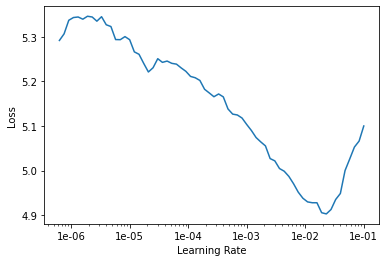

In [63]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_fc(100,3e-3, start_pct=0.35)

epoch,train_loss,valid_loss,error_rate,time
0,4.401374,5.235152,0.952188,00:56
1,4.044940,3.783546,0.932792,00:52
2,3.832426,3.959539,0.881822,00:54
3,3.616003,89.356003,0.943618,00:54
4,3.497687,10.115162,0.865133,00:55
5,3.464281,3.083662,0.841678,00:56
6,3.592428,11.363996,0.898963,00:55
7,3.568403,4.598475,0.839874,00:55
8,3.461746,4.241190,0.860171,00:54
9,3.813427,134.903183,0.966170,00:55


In [ ]:
learn.save('origresnet101-nopretrain-lr3e3-ep100-fitfc035')

In [ ]:
learn.recorder.plot_lr()

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [11]:
learn.validate()

[5.0242314, tensor(0.3532)]

### retrain 3e-3, pct_start 0.3

In [16]:
_ = learn.load("origresnet101-nopretrain-lr3e3-ep100-fitfc035")

In [17]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.260451,2.552503,0.359495,00:51
1,0.362745,55.287022,0.437077,00:51
2,0.641705,3.278273,0.437979,00:54
3,0.706627,8.827453,0.462336,00:54
4,0.663841,65.099976,0.506089,00:54
5,0.617774,4.765473,0.386107,00:54
6,0.497726,2.865548,0.377086,00:54
7,0.408601,1.960881,0.367614,00:54
8,0.367410,1.909126,0.358593,00:55
9,0.336446,2.676006,0.354533,00:54


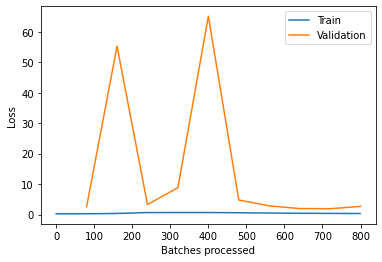

In [18]:
learn.recorder.plot_losses()

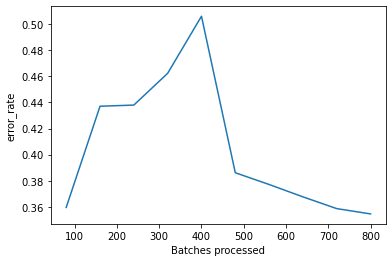

In [19]:
learn.recorder.plot_metrics()

### retrain 6e-3, pct_start 0.3

In [20]:
_ = learn.load("origresnet101-nopretrain-lr3e3-ep100-fitfc035")

In [21]:
learn.fit_one_cycle(10, 6e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.302890,2.232322,0.368516,00:54
1,0.729306,9.841444,0.562472,00:54
2,1.214820,6.384532,0.611637,00:54
3,1.212624,1.922135,0.491204,00:54
4,1.108237,2.426219,0.581867,00:53
5,0.989111,1.811664,0.454668,00:54
6,0.799411,1.767777,0.393775,00:54
7,0.638364,4.714131,0.374831,00:54
8,0.505410,2.476362,0.361299,00:54
9,0.443171,3.639778,0.358142,00:54


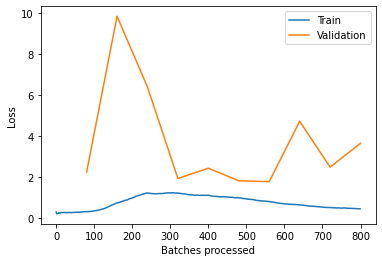

In [22]:
learn.recorder.plot_losses()

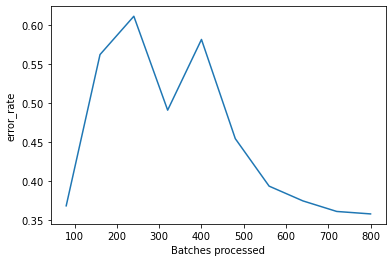

In [23]:
learn.recorder.plot_metrics()

### retrain 3e-3, pct_start 0.2

In [24]:
_ = learn.load("origresnet101-nopretrain-lr3e3-ep100-fitfc035")

In [25]:
learn.fit_one_cycle(10, 3e-3, pct_start=0.2)

epoch,train_loss,valid_loss,error_rate,time
0,0.292883,5.714558,0.370771,00:54
1,0.564967,2.439364,0.488498,00:54
2,0.733325,3.353148,0.434371,00:54
3,0.699337,1.699793,0.428507,00:54
4,0.613387,1.821563,0.399188,00:54
5,0.531488,3.928680,0.394677,00:54
6,0.452751,2.026350,0.373027,00:54
7,0.380730,1.819109,0.358142,00:54
8,0.333055,2.029884,0.359946,00:53
9,0.315819,1.679186,0.359495,00:54


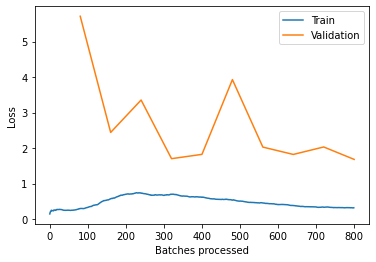

In [26]:
learn.recorder.plot_losses()

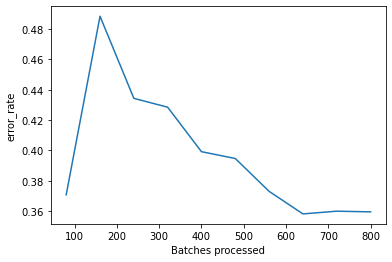

In [27]:
learn.recorder.plot_metrics()

### retrain 3e-3, pct_start 0.2

In [28]:
_ = learn.load("origresnet101-nopretrain-lr3e3-ep100-fitfc035")

In [29]:
learn.fit_one_cycle(10, 3e-3, pct_start=0.2)

epoch,train_loss,valid_loss,error_rate,time
0,0.287502,4.624449,0.360397,00:54
1,0.544416,5.938486,0.447452,00:54
2,0.731300,2.041697,0.435724,00:54
3,0.694574,1.794358,0.407307,00:53
4,0.639661,6.781748,0.419486,00:54
5,0.568372,1.747947,0.398737,00:53
6,0.470330,1.948686,0.364908,00:54
7,0.395712,1.933022,0.359495,00:53
8,0.334363,1.806080,0.355886,00:54
9,0.331044,1.649469,0.351376,00:54


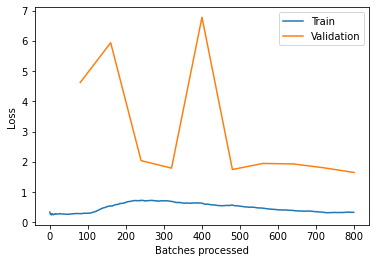

In [30]:
learn.recorder.plot_losses()

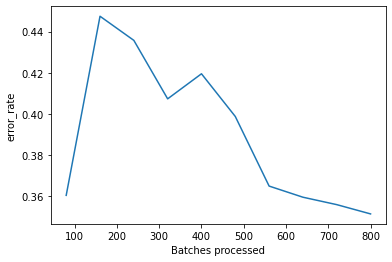

In [31]:
learn.recorder.plot_metrics()

### Interpretation

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

In [33]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

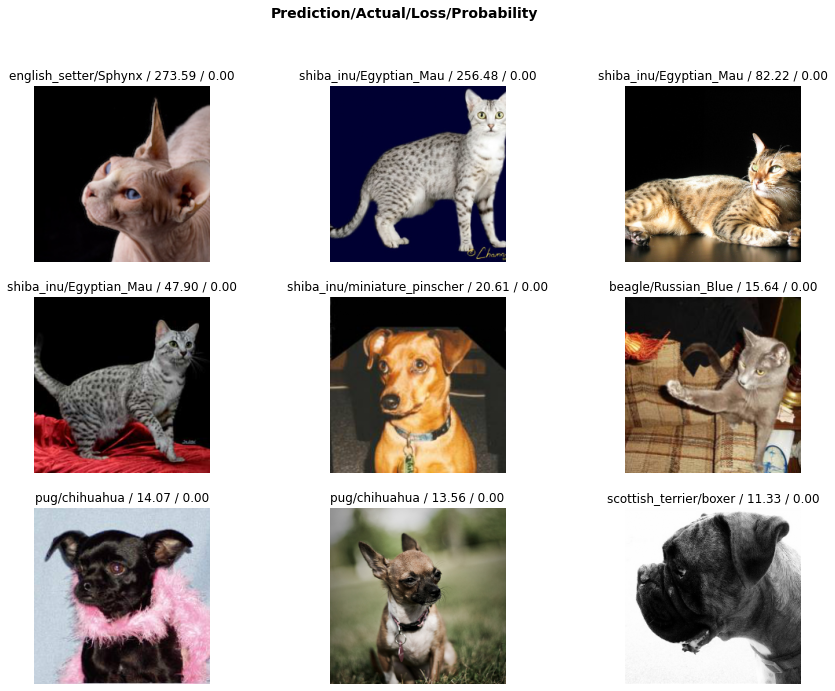

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

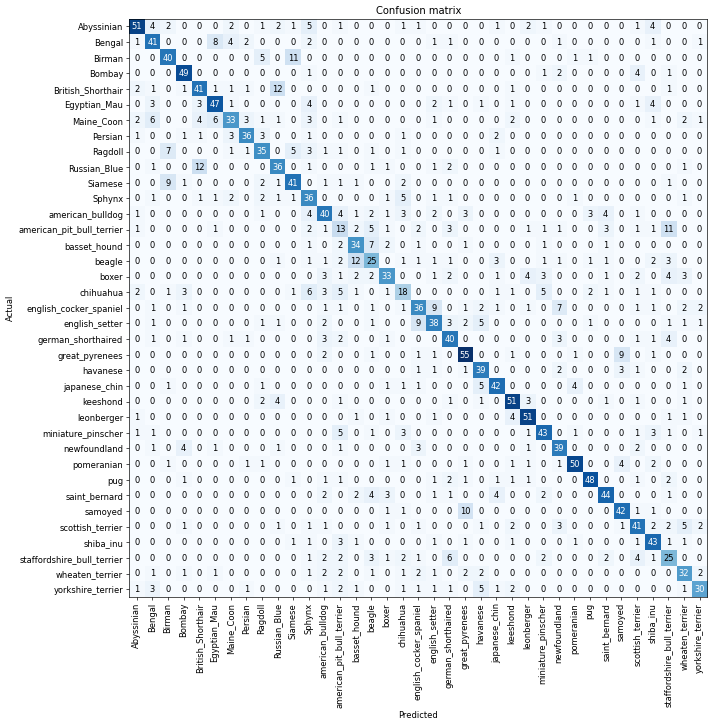

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0